In [4]:
import pandas as pd

# Carregar o CSV como DataFrame
file_path = "/content/data.csv"
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do DataFrame
print(df.head())

   id_paciente            nome genero  idade              endereco  \
0            1      José Silva      M     35  Rua dos Pássaros 123   
1            2  Maria Oliveira      F     28    Avenida Brasil 456   
2            3    Pedro Santos      M     42    Rua das Flores 789   
3            4     Luana Costa      F     25        Rua do Sol 321   
4            5      João Alves      M     39      Rua da Praia 901   

           cidade                    email fumante  renda  visitas_ano  \
0       São Paulo     jose.silva@email.com       N  50000            2   
1  Rio de Janeiro  mari.oliveira@email.com       S  30000            1   
2        Curitiba   pedro.santos@email.com       N  60000            3   
3    Porto Alegre    luana.costa@email.com       S  45000            2   
4        Salvador     joao.alves@email.com       N  55000            1   

  categoria  
0         A  
1         B  
2         A  
3         B  
4         A  


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.columns

Index(['id_paciente', 'nome', 'genero', 'idade', 'endereco', 'cidade', 'email',
       'fumante', 'renda', 'visitas_ano', 'categoria'],
      dtype='object')

In [8]:
df.head()

,id_paciente,nome,genero,idade,endereco,cidade,email,fumante,renda,visitas_ano,categoria
0,1,José Silva,M,35,Rua dos Pássaros 123,São Paulo,jose.silva@email.com,N,50000,2,A
1,2,Maria Oliveira,F,28,Avenida Brasil 456,Rio de Janeiro,mari.oliveira@email.com,S,30000,1,B
2,3,Pedro Santos,M,42,Rua das Flores 789,Curitiba,pedro.santos@email.com,N,60000,3,A
3,4,Luana Costa,F,25,Rua do Sol 321,Porto Alegre,luana.costa@email.com,S,45000,2,B
4,5,João Alves,M,39,Rua da Praia 901,Salvador,joao.alves@email.com,N,55000,1,A


In [9]:
# Passo 2: Converter a coluna 'fumante' em variáveis dummies
categorical = pd.get_dummies(df[["fumante"]], drop_first=True)

In [10]:
# Passo 3: Selecionar as colunas numéricas
numerical = df[["renda", "visitas_ano"]]

In [28]:
# Passo 4: Combinar colunas categóricas e numéricas
X = pd.concat([numerical, categorical], axis=1)
X.head()

,renda,visitas_ano,fumante_S
0,50000,2,False
1,30000,1,True
2,60000,3,False
3,45000,2,True
4,55000,1,False


In [32]:
# Passo 5: Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
normalized_df = pd.DataFrame(X_scaled, columns=X.columns)
normalized_df.head()

,renda,visitas_ano,fumante_S
0,0.085378,0.062137,-1.0
1,-1.540867,-1.180603,1.0
2,0.898500,1.304877,-1.0
3,-0.321183,0.062137,1.0
4,0.491939,-1.180603,-1.0


In [33]:
distorcoes = []
K = range(1, 11) # Adotando 10 clusters.
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(normalized_df)    # Treinando o modelo com o algoritmo K-Means por 10 vezes
    distorcoes.append(modelo01.inertia_)

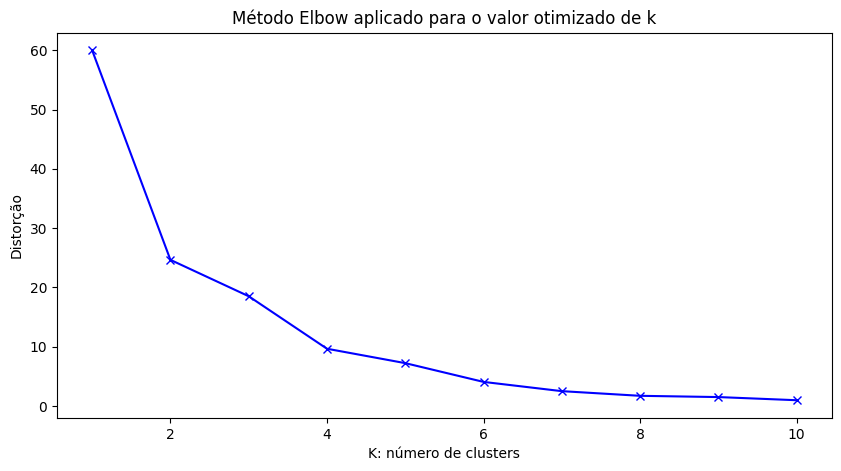

In [34]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [35]:
modelo_5 = KMeans(n_clusters=5)

In [36]:
modelo_5.fit(normalized_df)

KMeans(n_clusters=5)

In [38]:
normalized_df['Grupos'] = modelo_5.predict(normalized_df)

In [39]:
normalized_df.head()

,renda,visitas_ano,fumante_S,Grupos
0,50000,2,False,2
1,30000,1,True,1
2,60000,3,False,2
3,45000,2,True,4
4,55000,1,False,0


In [40]:
silhouette_5 = silhouette_score(X, X['Grupos'])
print(f'Silhouette score: {silhouette_5:.4f}')

Silhouette score: -0.1091
